# Assemble dataframe for testing
Natalia Vélez, September 2020

The goal of this notebook is to assemble a small dataframe, with <100 families, to start testing out the regression models.

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_context('talk')

## Load inputs

In [23]:
lifelog_df = pd.read_csv('outputs/all_lifelogs_compact.tsv', sep='\t', index_col = 0)
lifelog_df = lifelog_df[lifelog_df['era'] == 'boundless']
lifelog_df = lifelog_df.sort_values('tBirth')
lifelog_df = lifelog_df.reset_index(drop=True)
print(lifelog_df.shape)
lifelog_df.head()

/Users/nvelez/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(499181, 17)


,release,era,hash,playerID,tBirth,parent,birth,tDeath,death,age,cause_of_death,birthX,birthY,deathX,deathY,first,last
0,282.0,boundless,9b90770e9c4144721a6abe58faa161ef6b555786,2251779,1573257612,2251499,[-334 -521],1573257854,[-292 -455],4.02,hunger,-334,-521,-292,-455,MILA,DEADRICK
1,282.0,boundless,afb7da00e454ba6dac3cddbccfb8c14c5680ab1b,2251780,1573257622,2251439,[-184 -916],1573257870,[-182 -866],4.14,hunger,-184,-916,-182,-866,LEANDRA,LION
2,282.0,boundless,abbebf5a1056fd091dff74135c014aa1081435d8,2251781,1573257623,2251557,[-416 -524],1573258212,[-458 -505],9.82,hunger,-416,-524,-458,-505,AFUA,DEADRICK
3,282.0,boundless,40a960756347fa0a7c3d14791bd0379c6cc754cf,2251783,1573257634,2251595,[-155 -962],1573258615,[ -60 -824],16.34,hunger,-155,-962,-60,-824,FLAMUR,FIRE
4,282.0,boundless,873a5f9c31a80cd41c7a3b3451752f5cb19f382a,2251784,1573257649,2251416,[-333 -522],1573261249,[-338 -518],60.00,oldAge,-333,-522,-338,-518,ARES,DEADRICK


In [25]:
expertise_df = pd.read_csv('outputs/player_expertise.tsv', sep='\t')
expertise_df = expertise_df[['playerID', 'hash', 'gametime']]
expertise_df.head()

,playerID,hash,gametime
0,630641.0,00006debdd4d630a4a5aa395135a70a69e0db01e,0.00
1,630737.0,00006debdd4d630a4a5aa395135a70a69e0db01e,13.88
2,630799.0,00006debdd4d630a4a5aa395135a70a69e0db01e,18.86
3,214206.0,0001394319e5e63bb74219fef647e9ff24507a21,0.00
4,214530.0,0001394319e5e63bb74219fef647e9ff24507a21,33.78


In [26]:
family_membership = pd.read_csv('outputs/family_playerID.tsv', sep='\t', index_col = 0)
family_membership.head()

/Users/nvelez/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,playerID,family
0,3080084,time-1592284232_eve-3080067_name-PICKLE
1,3080114,time-1592284232_eve-3080067_name-PICKLE
2,3080111,time-1592284232_eve-3080067_name-PICKLE
3,3080108,time-1592284232_eve-3080067_name-PICKLE
4,3080104,time-1592284232_eve-3080067_name-PICKLE


In [27]:
model_df = lifelog_df.copy()
model_df = pd.merge(model_df, family_membership, on='playerID')
model_df = pd.merge(model_df, expertise_df, on=['hash', 'playerID'])
model_df = model
model_df.head()

,release,era,hash,playerID,tBirth,parent,birth,tDeath,death,age,cause_of_death,birthX,birthY,deathX,deathY,first,last,family,gametime
0,282.0,boundless,273f15da62d8f60d89b3b2d23d83485a6fb8192a,2252167,1573261529,-1,[-1250 -1320],1573261741,[-1206 -1387],17.52,disconnect,-1250,-1320,-1206,-1387,EVE,VIERNES,time-1573261529_eve-2252167_name-VIERNES,4434.50
1,282.0,boundless,a27048cbfbe301916080b973de34d538585e07d9,2252168,1573261565,2252167,[-1226 -1365],1573261741,[-1208 -1388],2.93,disconnect,-1226,-1365,-1208,-1388,WEDNESDAY,VIERNES,time-1573261529_eve-2252167_name-VIERNES,37.34
2,282.0,boundless,7a565a0508b2c945fd9fcfea1e04329d6a6fd9ff,2252178,1573261796,-1,[-261 -779],1573262194,[-284 -796],20.63,hunger,-261,-779,-284,-796,EVE,BELAND,time-1573261796_eve-2252178_name-BELAND,1285.81
3,282.0,boundless,4ccf142c5c09b6c639a7a65ba892e1edf682e614,2252179,1573261802,2252178,[-263 -780],1573262263,[-236 -892],7.68,hunger,-263,-780,-236,-892,JESSICA,BELAND,time-1573261796_eve-2252178_name-BELAND,235.39
4,282.0,boundless,618d0bb6be56d641cc1749401a499ae422f0daf2,2252180,1573261810,-1,[ -344 -1049],1573262583,[-409 -961],26.90,hunger,-344,-1049,-409,-961,EVE,BRAND,time-1573261810_eve-2252180_name-BRAND,40.15


## Sample a subset of families, based on success

In [54]:
family_df = pd.read_csv('outputs/family_fitness.tsv', sep='\t', index_col=None)
family_df = family_df[['family', 'sum', 'count']]
family_df = family_df.rename(columns={'sum': 'family_viability', 'count': 'family_size'})
family_df.head()

,family,family_viability,family_size
0,time-1573261529_eve-2252167_name-VIERNES,1,2
1,time-1573261796_eve-2252178_name-BELAND,2,8
2,time-1573261810_eve-2252180_name-BRAND,4,11
3,time-1573261816_eve-2252182_name-GERMAN,4,12
4,time-1573261826_eve-2252186_name-LOLI,4,16


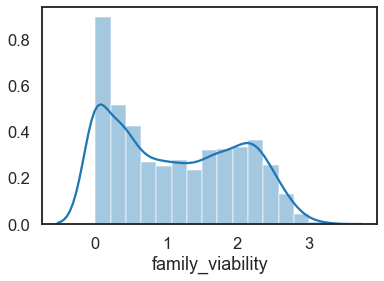

In [55]:
log_viability = np.log10(family_df['family_viability'])
sns.distplot(log_viability)

Split into quartiles

In [64]:
family_df['quantile'] = pd.qcut(log_viability, 4, np.arange(1,5))
family_df = family_df[family_df['quantile'] > 1]
family_df['quantile'] = family_df['quantile'].cat.remove_unused_categories()
family_df.head()

,family,family_viability,family_size,quantile
2,time-1573261810_eve-2252180_name-BRAND,4,11,2
3,time-1573261816_eve-2252182_name-GERMAN,4,12,2
4,time-1573261826_eve-2252186_name-LOLI,4,16,2
6,time-1573261840_eve-2252190_name-DEVILLE,3,18,2
9,time-1573261997_eve-2252229_name-MILLER,5,18,2


Sample N = 30 from each of the upper 3 quartiles:

In [74]:
family_sample = family_df.groupby('quantile').sample(n=30)
family_sample = family_sample.reset_index(drop=True)
sampled_families = family_sample['family'].values

family_sample.head()

,family,family_viability,family_size,quantile
0,time-1576905965_eve-2442826_name-RUSSIAN,4,7,2
1,time-1574656323_eve-2328937_name-TERRIBLE,3,4,2
2,time-1589945784_eve-3010587_name-RODAK,3,3,2
3,time-1577642656_eve-2487682_name-VANESS,3,5,2
4,time-1574225074_eve-2295494_name-GINGER,6,22,2


## Save to file

In [76]:
model_subsample = model_df[model_df['family'].isin(sampled_families)]
model_subsample = model_subsample.reset_index(drop=True)
print(model_subsample.shape)
model_subsample.head()

(14473, 19)


,release,era,hash,playerID,tBirth,parent,birth,tDeath,death,age,cause_of_death,birthX,birthY,deathX,deathY,first,last,family,gametime
0,282.0,boundless,618d0bb6be56d641cc1749401a499ae422f0daf2,2252180,1573261810,-1,[ -344 -1049],1573262583,[-409 -961],26.90,hunger,-344,-1049,-409,-961,EVE,BRAND,time-1573261810_eve-2252180_name-BRAND,40.15
1,282.0,boundless,778e7945ea9a8ea3d509ed12e9cce2d8ccab0a8d,2252209,1573261928,2252180,[-411 -940],1573262883,[-747 -933],15.92,hunger,-411,-940,-747,-933,JILL,BRAND,time-1573261810_eve-2252180_name-BRAND,4305.76
2,282.0,boundless,28763b85a5fd05f495157217dbeb85376e83fd3e,2252228,1573261997,2252180,[-419 -938],1573262109,[-409 -941],1.87,hunger,-419,-938,-409,-941,JESS,BRAND,time-1573261810_eve-2252180_name-BRAND,2460.54
3,282.0,boundless,c613fe1d69fb0bbce0f52a4cbefb4060d3cd8122,2252231,1573262004,2252180,[-418 -938],1573263188,[-679 -898],19.73,disconnect,-418,-938,-679,-898,JOAN,BRAND,time-1573261810_eve-2252180_name-BRAND,238.83
4,282.0,boundless,4cfb85a4c71addd382be1534cf89f854db9eab11,2252270,1573262155,2252180,[-406 -942],1573263188,[-668 -892],17.22,disconnect,-406,-942,-668,-892,JASMINE,BRAND,time-1573261810_eve-2252180_name-BRAND,29207.52


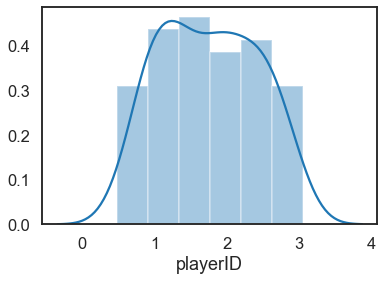

In [82]:
subsample_counts = model_subsample.groupby('family')['playerID'].agg('count').reset_index()
sns.distplot(np.log10(subsample_counts['playerID']))

In [83]:
model_subsample.to_csv('outputs/test_regression_inputs.csv', index=None)